In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
import osmnx as ox

In [ ]:
import pandas as pd
## the routes columns is the output from OSMnx
rich_routes=pd.read_pickle('rich_routes.pkl')
poor_routes=pd.read_pickle('poor_routes.pkl')
rich_routes.head()

In [2]:
df=pd.read_pickle('BostonHomeOthers.pkl')

In [3]:
df.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
0,25025000100,POINT (-71.13859 42.36148),osm_10006,POINT (-71.09818 42.33470),3,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."
1,25025000100,POINT (-71.13859 42.36148),osm_10163,POINT (-71.12698 42.30325),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."
2,25025000100,POINT (-71.13859 42.36148),osm_10164,POINT (-71.12704 42.30256),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."
3,25025000100,POINT (-71.13859 42.36148),osm_10225,POINT (-71.04911 42.35279),2,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1388...","[3518393250, 3518393255, 3518390018, 61339668,..."
4,25025000100,POINT (-71.13859 42.36148),osm_10235,POINT (-71.08711 42.34110),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."


In [4]:
incomes=df['Mean income'].unique()
incomes

array([100193, 106950, 103198, 125179,  92456,  81089,  68135,  98636,
        65816,  77251,  43678,  73065,  80060,  75866,  83554, 108115,
        81142,  68490,  43476,  62693,  43827,  34402,  76749,  74694,
       195377, 191480, 275685, 212083, 205227, 123214, 139549, 210176,
       127000, 115200, 165381, 140873, 132093,  63260,  71663,  86212,
        81943, 119472, 132803, 158414, 180145,  27459, 128308,  67161,
        22833, 169963, 169811,  73552, 178620,  72417, 180313, 257544,
       216902, 137799, 124111, 105260, 121015,  43592,  51857,  48115,
        33390,  29671,  32940,  74792,  36780,  63721,  52339,  34590,
        71799,  56876,  60381,  38962,  64030,  49733,  47145,  41877,
        44065,  52648,  86298, 119718,  81724,  82786,  59553,  58263,
        52921,  64289,  65481,  81465,  82737,  70862,  47318,  52459,
        67812,  74807,  75317,  70920,  85577, 104904, 102016, 101964,
        99742,  74738,  59244,  60743,  59231,  93098, 101210,  79028,
      

In [5]:
lowest=np.sort(incomes)[0:10]
highest=np.sort(incomes)[::-1][0:10]

In [6]:
lowest

array([22833, 27459, 29671, 32940, 33390, 34402, 34590, 36780, 38962,
       41877])

In [7]:
highest

array([275685, 257544, 216902, 212083, 210176, 205227, 201483, 195377,
       191480, 187796])

In [8]:
poor=gpd.GeoDataFrame(df[df['Mean income'].isin(lowest)],geometry='route_geometry')
rich=gpd.GeoDataFrame(df[df['Mean income'].isin(highest)],geometry='route_geometry')

### set to w>=10 for rich/poor

In [9]:
poor=poor[poor.weights>=10]
rich=rich[rich.weights>=10]

In [20]:
poor.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

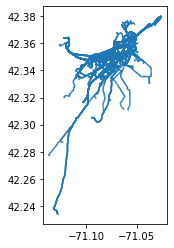

In [10]:
rich.plot()

<AxesSubplot:>

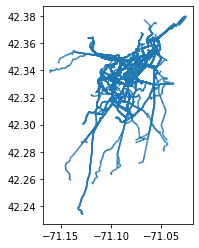

In [11]:
poor.plot()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

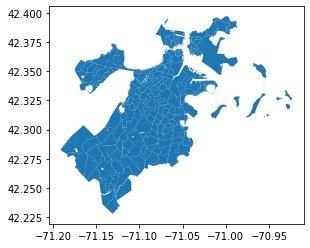

In [12]:
# Boston city boundary
Boston=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\City_of_Boston_Boundary-shp\City_of_Boston_Boundary.shp')
Boston=Boston.to_crs('EPSG:4326')
# Boston census tracts
Boston_tracts=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston_tracts_wTGPopAndOtherPopOAP_racial.geojson')
Boston_tracts=gpd.clip(Boston_tracts,Boston,keep_geom_type=True)
Boston_tracts=Boston_tracts[['GEOID10', 'neighbour', 'geometry']]
Boston_tracts['tract_centroid']=Boston_tracts['geometry'].centroid
Boston_tracts.plot()

In [24]:
rich.to_pickle('rich_routes.pkl')

In [22]:
rich.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
7311,25025010600,POINT (-71.07939 42.34764),osm_10235,POINT (-71.08711 42.34110),16,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((-71.07944 42.34727, -71.0795...","[3051043395, 61423597, 61423618, 61385665, 614..."
7312,25025010600,POINT (-71.07939 42.34764),osm_10290,POINT (-71.06385 42.35022),14,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((-71.07944 42.34727, -71.0795...","[3051043395, 61423597, 61371292, 2498763315, 6..."
7313,25025010600,POINT (-71.07939 42.34764),osm_10307,POINT (-71.05861 42.35734),12,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((-71.07944 42.34727, -71.0795...","[3051043395, 61423597, 61371292, 2498763315, 6..."
7323,25025010600,POINT (-71.07939 42.34764),osm_10857,POINT (-71.09690 42.33501),10,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((-71.07944 42.34727, -71.0795...","[3051043395, 61423597, 61423618, 61385665, 614..."
7335,25025010600,POINT (-71.07939 42.34764),osm_111,POINT (-71.09682 42.34115),39,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((-71.07944 42.34727, -71.0795...","[3051043395, 61423597, 61423618, 61385665, 304..."


In [25]:
poor.to_pickle('poor_routes.pkl')

In [23]:
poor.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
6456,25025010405,POINT (-71.08961 42.33987),osm_10006,POINT (-71.09818 42.33470),37,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((-71.09056 42.33959, -71.0906...","[6234776592, 6234776595, 61385841, 61374381, 6..."
6460,25025010405,POINT (-71.08961 42.33987),osm_10235,POINT (-71.08711 42.34110),66,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((-71.09056 42.33959, -71.0904...","[6234776592, 61343390, 61342673]"
6462,25025010405,POINT (-71.08961 42.33987),osm_10290,POINT (-71.06385 42.35022),19,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((-71.09056 42.33959, -71.0904...","[6234776592, 61343390, 61371056, 1024147105, 6..."
6463,25025010405,POINT (-71.08961 42.33987),osm_10307,POINT (-71.05861 42.35734),34,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((-71.09056 42.33959, -71.0904...","[6234776592, 61343390, 61371056, 1024147105, 6..."
6476,25025010405,POINT (-71.08961 42.33987),osm_10857,POINT (-71.09690 42.33501),16,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((-71.09056 42.33959, -71.0906...","[6234776592, 6234776595, 61385841, 61374381, 6..."


# Ignore the following

# Reproject to have meters (for Length distribution)

In [13]:
rePoor=poor.to_crs('EPSG:26919')

In [14]:
reRich=rich.to_crs('EPSG:26919')

In [18]:
rePoor.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
6456,25025010405,POINT (-71.08961 42.33987),osm_10006,POINT (-71.09818 42.33470),37,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 6234776595, 61385841, 61374381, 6..."
6460,25025010405,POINT (-71.08961 42.33987),osm_10235,POINT (-71.08711 42.34110),66,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 61343390, 61342673]"
6462,25025010405,POINT (-71.08961 42.33987),osm_10290,POINT (-71.06385 42.35022),19,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 61343390, 61371056, 1024147105, 6..."
6463,25025010405,POINT (-71.08961 42.33987),osm_10307,POINT (-71.05861 42.35734),34,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 61343390, 61371056, 1024147105, 6..."
6476,25025010405,POINT (-71.08961 42.33987),osm_10857,POINT (-71.09690 42.33501),16,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 6234776595, 61385841, 61374381, 6..."


In [19]:
reRich.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
7311,25025010600,POINT (-71.07939 42.34764),osm_10235,POINT (-71.08711 42.34110),16,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((328721.762 4690428.249, 3287...","[3051043395, 61423597, 61423618, 61385665, 614..."
7312,25025010600,POINT (-71.07939 42.34764),osm_10290,POINT (-71.06385 42.35022),14,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((328721.762 4690428.249, 3287...","[3051043395, 61423597, 61371292, 2498763315, 6..."
7313,25025010600,POINT (-71.07939 42.34764),osm_10307,POINT (-71.05861 42.35734),12,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((328721.762 4690428.249, 3287...","[3051043395, 61423597, 61371292, 2498763315, 6..."
7323,25025010600,POINT (-71.07939 42.34764),osm_10857,POINT (-71.09690 42.33501),10,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((328721.762 4690428.249, 3287...","[3051043395, 61423597, 61423618, 61385665, 614..."
7335,25025010600,POINT (-71.07939 42.34764),osm_111,POINT (-71.09682 42.34115),39,White,25025010600,"Census Tract 106, Suffolk County, Massachusetts",195377,"MULTILINESTRING ((328721.762 4690428.249, 3287...","[3051043395, 61423597, 61423618, 61385665, 304..."


# Income top 10 rich tracts

In [17]:
reRich.weights.describe()

count    803.000000
mean      27.843088
std       27.721725
min       10.000000
25%       13.000000
50%       19.000000
75%       31.500000
max      336.000000
Name: weights, dtype: float64

# images lonlat

In [ ]:
labels=pd.read_csv('images_latLon.csv')
labels.columns=['Unnamed: 0',  'lat','lon']
images=gpd.points_from_xy(labels['lon'],labels['lat'])

In [102]:
images=images.set_crs('EPSG:4326')

In [103]:
images=images.to_crs('EPSG:26919')

<AxesSubplot:>

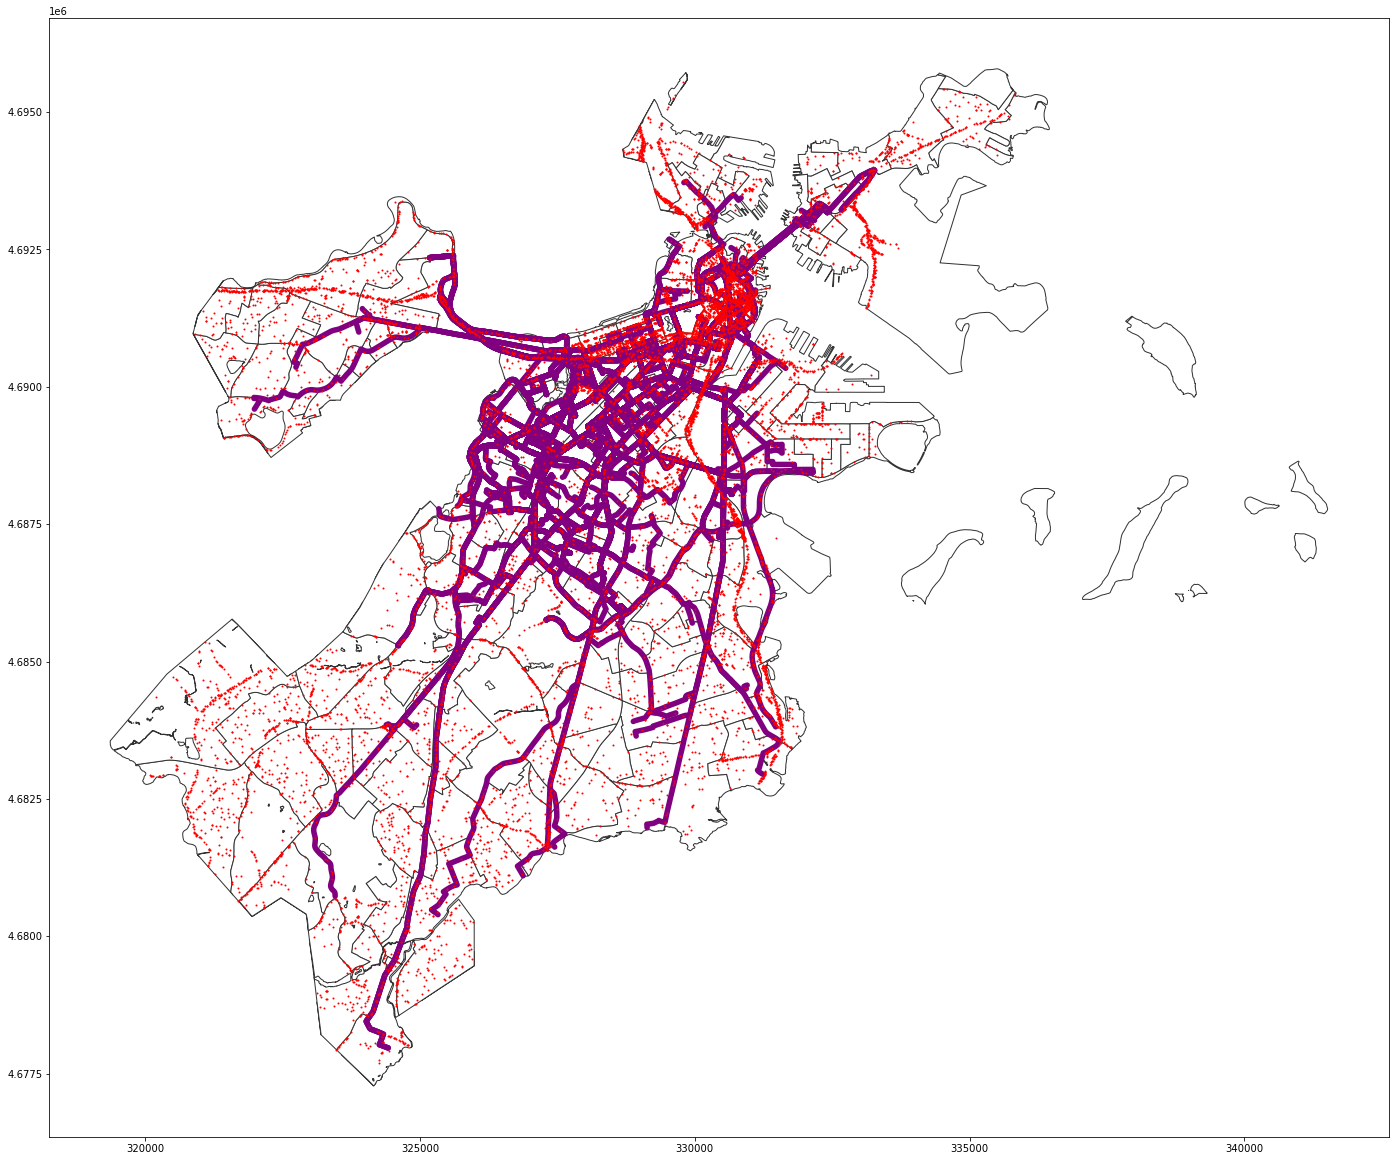

In [124]:
basemap=(Boston_tracts.to_crs('EPSG:26919')).plot(figsize=[24,24],color='white',edgecolor='#333333')
buffer.plot(ax=basemap,color='purple')
images.plot(ax=basemap,color='red',markersize=1)


In [85]:
Boston_tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# images overlap 
# !! Ignore this part, use QGIS/ArcGIS instead for quick implementation

In [125]:
poorImages=images[images.touches(rePoor)]
poorImages

D:\anaconda3\lib\site-packages\geopandas\base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
D:\anaconda3\lib\site-packages\geopandas\geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,Unnamed_ 0,lat,lon,geometry


In [119]:
images.crs

<Projected CRS: EPSG:26919>
Name: NAD83 / UTM zone 19N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 72°W to 66°W and NAD83 by country
- bounds: (-72.0, 14.92, -66.0, 84.0)
Coordinate Operation:
- name: UTM zone 19N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [120]:
poorImages.crs

<Projected CRS: EPSG:26919>
Name: NAD83 / UTM zone 19N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 72°W to 66°W and NAD83 by country
- bounds: (-72.0, 14.92, -66.0, 84.0)
Coordinate Operation:
- name: UTM zone 19N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [127]:
rePoor.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
6456,25025010405,POINT (-71.08961 42.33987),osm_10006,POINT (-71.09818 42.33470),37,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 6234776595, 61385841, 61374381, 6..."
6460,25025010405,POINT (-71.08961 42.33987),osm_10235,POINT (-71.08711 42.34110),66,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 61343390, 61342673]"
6462,25025010405,POINT (-71.08961 42.33987),osm_10290,POINT (-71.06385 42.35022),19,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 61343390, 61371056, 1024147105, 6..."
6463,25025010405,POINT (-71.08961 42.33987),osm_10307,POINT (-71.05861 42.35734),34,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 61343390, 61371056, 1024147105, 6..."
6476,25025010405,POINT (-71.08961 42.33987),osm_10857,POINT (-71.09690 42.33501),16,White,25025010405,"Census Tract 104.05, Suffolk County, Massachus...",34402,"MULTILINESTRING ((327784.920 4689598.270, 3277...","[6234776592, 6234776595, 61385841, 61374381, 6..."


In [128]:
rePoor.columns

Index(['tract', 'tract_centroid', 'park', 'park_centroid', 'weights',
       'neighbour', 'id', 'Geographic Area Name', 'Mean income',
       'route_geometry', 'routes'],
      dtype='object')

In [132]:
rePoor[['tract', 'park',  'weights',
       'neighbour', 'Mean income',
       'route_geometry']].to_file('repoor.gpkg',driver='GPKG')

In [133]:
reRich[['tract', 'park',  'weights',
       'neighbour', 'Mean income',
       'route_geometry']].to_file('rerich.gpkg',driver='GPKG')

In [136]:
images.to_file('reImages.gpkg',drive='GPKG')

In [137]:
images.columns

Index(['Unnamed_ 0', 'lat', 'lon', 'geometry'], dtype='object')